# Anomaly Detection
Here are some examples of anomaly detection (outliers) for univariate and multivariate data. Here are some additional reading if you are interested in learning more:
* <a href="https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/">How to Use Statistics to Identify Outliers in Data</a>

## Imports

In [1]:
import numpy as np
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from numpy import percentile
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

# Univariate data

## Dataset Generation
We generate a dataset to be used in the examples.

Mean: 25.533, StDev: 4.550


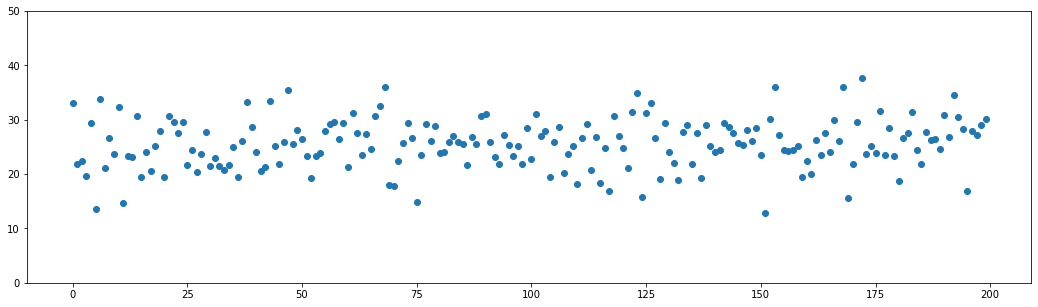

In [2]:
# Seed the random number generator
seed(1)
no = 200
# Generate univariate observations
x = 5 * randn(no) + 25
y = range(0,no)
# Summarize dataset
print("Mean: {0:.3f}, StDev: {1:.3f}".format(mean(x), std(x)))
# Plot
plt.figure(figsize=(18,5))
plt.ylim(0,50)
plt.scatter(y,x)
plt.show()

## Standard Deviation method
* 1 Standard Deviation from the Mean: 68%
* 2 Standard Deviations from the Mean: 95%
* 3 Standard Deviations from the Mean: 99.7%

Identified outliers: 12


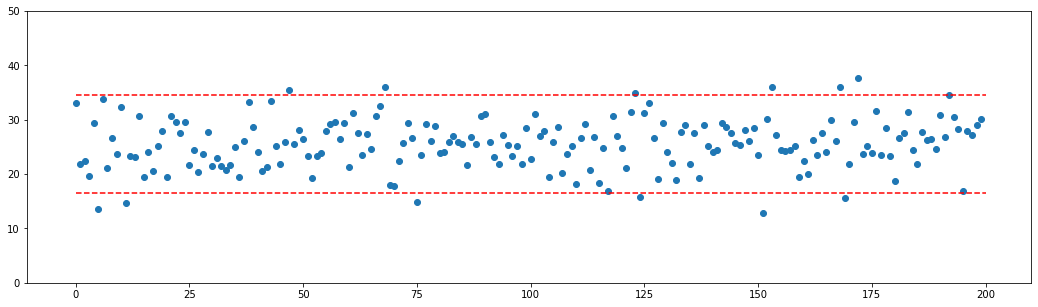

In [3]:
# Calculate summary statistics
x_mean, x_std = mean(x), std(x)
# Identify outliers
cut_off = x_std * 2
lower, upper = x_mean - cut_off, x_mean + cut_off
outliers = [v for v in x if v < lower or v > upper]
print("Identified outliers: {0}".format(len(outliers)))
# Plot
plt.figure(figsize=(18,5))
plt.hlines(lower, 0, no, linestyles="dashed", colors="red")
plt.hlines(upper, 0, no, linestyles="dashed", colors="red")
plt.ylim(0,50)
plt.scatter(y,x)
plt.show()

## Interquartile Range method

Percentiles: 25th=22.693, 75th=28.543, IQR=5.851
Identified outliers: 3


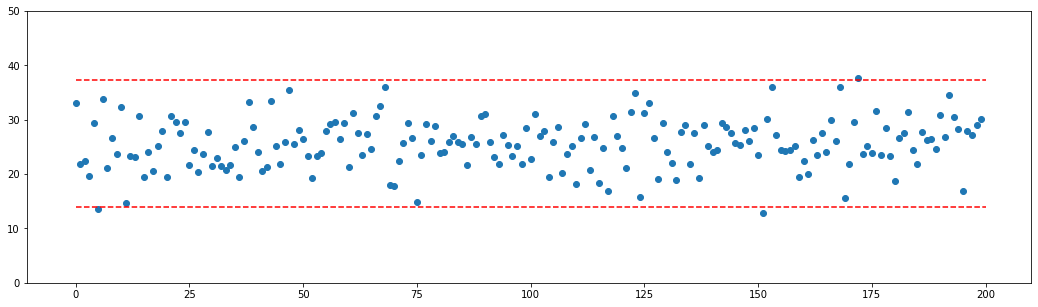

In [4]:
# Calculate interquartile range
q25, q75 = percentile(x, 25), percentile(x, 75)
iqr = q75 - q25
print("Percentiles: 25th={0:.3f}, 75th={1:.3f}, IQR={2:.3f}".format(q25, q75, iqr))
# Calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliers = [v for v in x if v < lower or v > upper]
print("Identified outliers: {0}".format(len(outliers)))
# Plot
plt.figure(figsize=(18,5))
plt.hlines(lower, 0, no, linestyles="dashed", colors="red")
plt.hlines(upper, 0, no, linestyles="dashed", colors="red")
plt.ylim(0,50)
plt.scatter(y,x)
plt.show()

# Multivariate data

## Dataset Generation
We generate a dataset to be used in the examples.

X0: Mean: 25.533, StDev: 4.550
X1: Mean: 24.974, StDev: 5.176


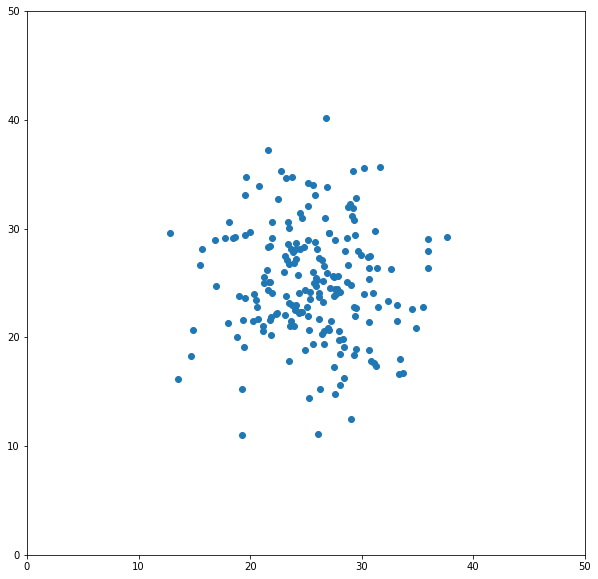

In [5]:
# Seed the random number generator
seed(1)
no = 200
# Generate multivariate observations
x0 = 5 * randn(no) + 25
x1 = 5 * randn(no) + 25
# Summarize dataset
print("X0: Mean: {0:.3f}, StDev: {1:.3f}".format(mean(x0), std(x0)))
print("X1: Mean: {0:.3f}, StDev: {1:.3f}".format(mean(x1), std(x1)))
# Plot
plt.figure(figsize=(10,10))
plt.ylim(0,50)
plt.xlim(0,50)
plt.scatter(x0,x1)
plt.show()

## Standard Deviation method

Identified outliers: 21


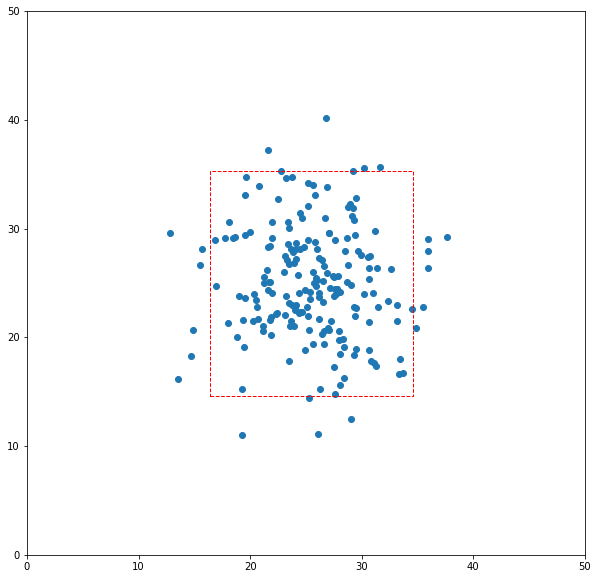

In [6]:
# Calculate summary statistics
x0_mean, x0_std = mean(x0), std(x0)
x1_mean, x1_std = mean(x1), std(x1)

# Identify outliers
cut_off0 = x0_std * 2
cut_off1 = x1_std * 2
lower0, upper0 = x0_mean - cut_off0, x0_mean + cut_off0
lower1, upper1 = x1_mean - cut_off1, x1_mean + cut_off1
outliers = []
for v0, v1 in zip(x0,x1):
    if (v0 < lower0 or v0 > upper0) or (v1 < lower1 or v1 > upper1):
        outliers.append([v0,v1])
print("Identified outliers: {0}".format(len(outliers)))

# Plot
plt.figure(figsize=(10,10))
plt.ylim(0,50)
plt.xlim(0,50)
e = Rectangle((lower0, lower1), upper0-lower0, upper1-lower1, linestyle="dashed", color="red", fill=False)
ax = plt.gca()
ax.add_patch(e)
plt.scatter(x0,x1)
plt.show()

## Interquartile Range method

X0: percentiles: 25th=22.693, 75th=28.543, IQR=5.851
X1: percentiles: 25th=21.579, 75th=28.424, IQR=6.845
Identified outliers: 6


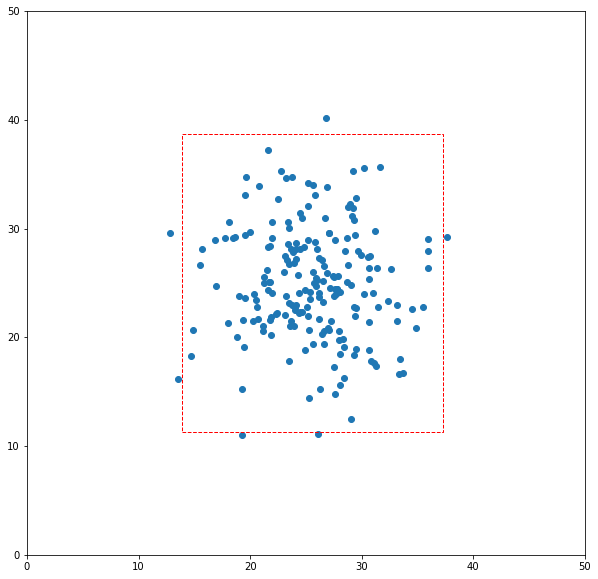

In [7]:
# Calculate interquartile range
q25_0, q75_0 = percentile(x0, 25), percentile(x0, 75)
q25_1, q75_1 = percentile(x1, 25), percentile(x1, 75)
iqr_0 = q75_0 - q25_0
iqr_1 = q75_1 - q25_1
print("X0: percentiles: 25th={0:.3f}, 75th={1:.3f}, IQR={2:.3f}".format(q25_0, q75_0, iqr_0))
print("X1: percentiles: 25th={0:.3f}, 75th={1:.3f}, IQR={2:.3f}".format(q25_1, q75_1, iqr_1))
# Calculate the outlier cutoff
cut_off0 = iqr_0 * 1.5
cut_off1 = iqr_1 * 1.5

lower0, upper0 = q25_0 - cut_off0, q75_0 + cut_off0
lower1, upper1 = q25_1 - cut_off1, q75_1 + cut_off1
outliers = []
for v0, v1 in zip(x0,x1):
    if (v0 < lower0 or v0 > upper0) or (v1 < lower1 or v1 > upper1):
        outliers.append([v0,v1])
print("Identified outliers: {0}".format(len(outliers)))

# Plot
plt.figure(figsize=(10,10))
plt.ylim(0,50)
plt.xlim(0,50)
e = Rectangle((lower0, lower1), upper0-lower0, upper1-lower1, linestyle="dashed", color="red", fill=False)
ax = plt.gca()
ax.add_patch(e)
plt.scatter(x0,x1)
plt.show()